#### **Application of Data Analytics for Knowledge Discovery in Point-of-Sale (POS) Transaction Data at Ollems Farm**

**Background**

Sales analysis plays a pivotal role in providing comprehensive insights into sales activities. Its significance extends to enhancing sales profitability, facilitating sales forecasting and strategic planning, both at the customer and product category levels. Additionally, it plays a crucial role in assessing the alignment of the sales force with their sales targets. By evaluating the performance of salespersons and product groups in relation to the available resources, it aids in gauging the efficacy of sales efforts. Central to this analysis is the aggregation of sales data from various sources. The historical sales data is meticulously organized, encompassing a wide spectrum of user-defined criteria, such as salesperson, product category, customer, warehouse, geographical region, customer category, stock code, order type, and branch.

This research endeavors to leverage advanced business intelligence methodologies to delve into the point-of-sale (POS) transaction data of Ollems Farm. By doing so, it aims to extract valuable insights that illuminate the performance of various Stock Keeping Units (SKUs). Moreover, it aims to track customer retention rates and segment customers based on recency, frequency, and monetary value. This comprehensive analysis is envisioned to equip Ollems Farm with the necessary insights to facilitate informed decision-making pertaining to products and customer strategies.

**Objectives**

The study's primary goal is to unravel the intricacies of sales, product, and customer dynamics within Ollems Farm's operations. The specific objectives are as follows:

Identify High-Value Customers: Uncover the customers who contribute significantly to the farm's revenue, enabling targeted strategies to nurture these valuable relationships.

Unveil Revenue-Generating Products: Pinpoint the products that drive the most substantial revenue, aiding in inventory management and strategic planning.

Analyze Market Trends and Buying Patterns: Employ data-driven techniques to discern emerging market trends and customer behavior, providing valuable insights for adapting business strategies and optimizing offerings.

**Scope**

The research will encompass crucial metric indicators pertinent to Ollems Farm's sales performance. This comprehensive investigation will entail the utilization of essential variables encompassing sales, orders, and other pertinent sales data spanning a two-year period from January 2021 to December 2022. Informed recommendations will be derived from meticulous analysis of this dataset. In the context of customer analysis, the segmentation of customers was presumed to be conducted the day following the conclusion of the final recorded transaction.

In [1]:
%%capture
pip install prophet

In [2]:
%%capture
pip install -U kaleido

In [3]:
# Importing sll the necessary libraries and applying the right settings
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.io as pio
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px
import locale
import warnings

# Filter out DeprecationWarning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Set a simple warning filter to ignore certain warning types
warnings.simplefilter("ignore")

# Set display options to show all columns and a maximum of 500 rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

# Use %matplotlib inline for displaying plots directly in the Jupyter Notebook
%matplotlib inline

# For Forecasting
from prophet import Prophet
import holidays

# Set the display format for numbers with commas
pd.options.display.float_format = '{:,.2f}'.format

# Set the default renderer to 'iframe' for online rendering
# pio.renderers.default = 'iframe'

In [4]:
# reading the data using pandas
df = pd.read_csv("https://raw.githubusercontent.com/konye28/ollems-project/main/product_sale_merged_data_2021_2022.csv")

##### **Data Description**

In [5]:
df.head()

,Product,SKU,Contact ID,Invoice No.,Date,Quantity,Unit Price,Discount,Tax,Price inc. tax,Total
0,Old layers,179,CO0029,11716,01/01/2021,2 Pc(s),2200,0,0.0000(),2200,"4,400.00"
1,Cow Beef/Kg,232,CO0029,11716,01/01/2021,1 Kg,2500,0,0.0000(),2500,"2,500.00"
2,Turkey,160,CO0838,11717,01/01/2021,2.5 Kg,2000,0,0.0000(),2000,"5,000.00"
3,Chicken Wings,158,CO0577,11718,01/01/2021,1 Kg,1900,0,0.0000(),1900,"1,900.00"
4,Titus,161,CO0577,11718,01/01/2021,0.9 Kg,1300,0,0.0000(),1300,"1,170.00"


>*The presented table above displays the initial five entries within the dataset.*

In [6]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 29464
Number of columns: 11



>*The shape method reveals that the dataset comprises 29,464 rows and 11 columns.*

In [7]:
column_names = df.columns.tolist()
print(column_names)

['Product', 'SKU', 'Contact ID', 'Invoice No.', 'Date', 'Quantity', 'Unit Price', 'Discount', 'Tax', 'Price inc. tax', 'Total']


>*Presented above are the variable names within the POS data. They include Product, SKU, Customer Name, Contact ID, Invoice No, Date, Quantity, Unit Price, Discount, Tax, Price including tax, and Total.*

In [8]:
if df.isnull().sum().any():
    missing_values = df.isnull().sum()
    print("Columns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values in the data.")

No missing values in the data.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29464 entries, 0 to 29463
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product         29464 non-null  object 
 1   SKU             29464 non-null  object 
 2   Contact ID      29464 non-null  object 
 3   Invoice No.     29464 non-null  int64  
 4   Date            29464 non-null  object 
 5   Quantity        29464 non-null  object 
 6   Unit Price      29464 non-null  int64  
 7   Discount        29464 non-null  int64  
 8   Tax             29464 non-null  object 
 9   Price inc. tax  29464 non-null  int64  
 10  Total           29464 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 2.5+ MB


>*The df.info() method provides an overview of the DataFrame's structure and content.It displays the count of non-null values for each column, along with the data type of each column. This information helps to identify missing values, understand the memory usage, and get a general sense of the data. The POS data has object, integer and float variable types.*

In [10]:
df.describe()

,Invoice No.,Unit Price,Discount,Price inc. tax,Total
count,"29,464.00","29,464.00","29,464.00","29,464.00","29,464.00"
mean,"21,738.23","2,252.72",0.00,"2,252.72","4,408.31"
std,"5,810.94","1,747.30",0.00,"1,747.30","6,099.53"
min,"11,716.00",150.00,0.00,150.00,105.00
25%,"16,746.75","1,600.00",0.00,"1,600.00","1,750.00"
50%,"21,744.50","2,000.00",0.00,"2,000.00","2,700.00"
75%,"26,770.25","2,500.00",0.00,"2,500.00","4,600.00"
max,"31,743.00","50,000.00",0.00,"50,000.00","168,000.00"


>*The summary statistics gives an overview of the numerical predictors. For instance, the table above shows that the prices of items ranges from 150 Naira to 50,00 Naira. Also, discount are not usually applied for purchases and tax aren't captured in the transactions.*

##### **Data Preprocessing & Feature Enginnering**

In [11]:
# Drop columns that are not needed for the analysis
columns_to_drop = ['Discount', 'Tax', 'Price inc. tax']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Format the date variable
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Feature Engineering
df['Month'] = df['Date'].dt.month_name()
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Year'] = df['Date'].dt.year

# Calculate the week number starting from January 1, 2021
df['Week'] = ((df['Date'] - pd.to_datetime('2021-01-01')).dt.days // 7) + 1

# Create a copy of the preprocessed data for further analysis
count_df = df.copy()

##### **Generating Sales Business Insights**

During the period from January 1, 2021, to December 31, 2022, a total of 29,464 sales transactions were recorded at Ollems Farm..

In [12]:
#first and last order dates
df['Date'].min(), df['Date'].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2022-12-31 00:00:00'))

In [13]:
df[df['Contact ID'] == "CO0005"][['Total']].sum()

Total   563,415.00
dtype: float64

>*The total value of Ollems Credit amounts to N563,415. This will be deducted from the overall revenue generated by the business.*

In [14]:
df["SKU"].nunique()

75

>*Within the specified time frame, Ollems successfully sold a total of 75 unique SKUs.*

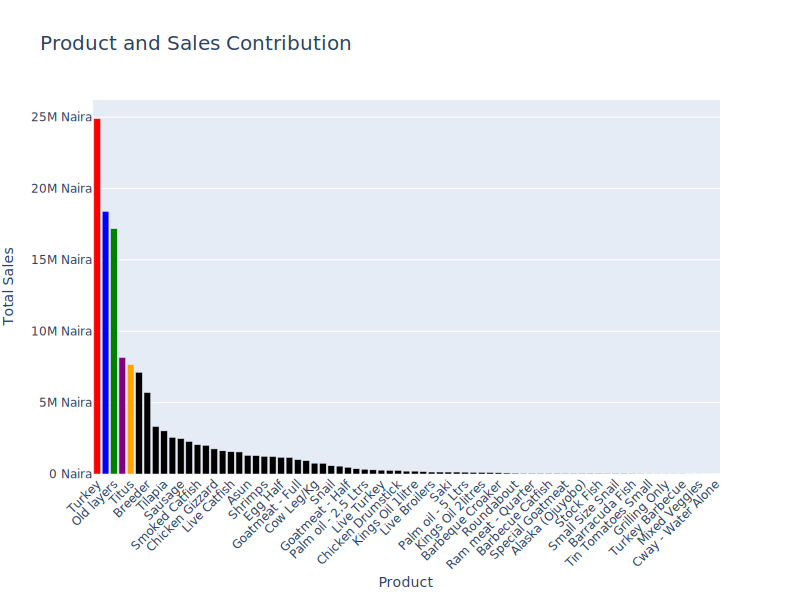

In [15]:
# Group data by product and calculate total sales
top_selling = df.groupby("Product")["Total"].sum().reset_index().sort_values("Total", ascending=False).reset_index(drop=True)

# Create a list of custom colors for each bar
custom_colors = ['red', 'blue', 'green', 'purple', 'orange']  # Add more colors as needed

# Create a bar chart
data = [go.Bar(x=top_selling["Product"], y=top_selling["Total"], marker=dict(color=custom_colors))]
layout = go.Layout(title="Product and Sales Contribution", xaxis=dict(title="Product"), yaxis=dict(title="Total Sales"))
fig = go.Figure(data=data, layout=layout)

# Customize the layout
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickangle=-45,
    yaxis_ticksuffix=" Naira",
    showlegend=False,
    autosize=False,
    width=800,
    height=600)


# Show the bar chart
fig.show("svg")

>*The chart above depicts the top 5 products that had the highest sales: Turkey, Nigerian Soft Chicken, Old layers, Chicken Orobo and Titus. Their respective sales amounts were N24,890,918.50, N18,394,459.75, N17,186,800, N8,159,687, and N7,662,136.50 respectively. On the other hand, the least five products sold during the specified period are Turkey Barbecue, Ollems Frozen Broilers, Mixed Veggies, Cow Beef and Cway - Water Alone	with total sales of N7,000, N2,500, N2,000, N1,500 and N600.00 respectively.*

In [16]:
# Calculate the total revenue after deduction and print the result
contact_id_total = df[df['Contact ID'] == "CO0005"]['Total'].sum() # credit sales
total_revenue_after_deduction = df['Total'].sum() - contact_id_total
print("Total revenue generated during the period amounts to:", "N{:,}".format(total_revenue_after_deduction))

Total revenue generated during the period amounts to: N129,322,963.25


>*The total revenue generated is calculated after deducting the revenue made by the business from credit sales*

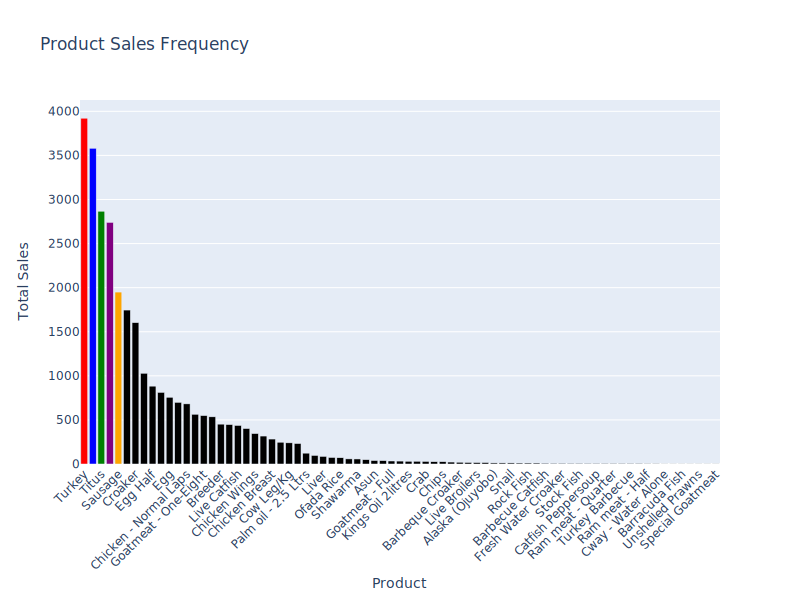

In [17]:
product_count = df.Product.value_counts().sort_values(ascending=False).reset_index()
product_count.columns = ["Product", "Count"]

# Create a list of custom colors for each bar
custom_colors = ['red', 'blue', 'green', 'purple', 'orange']  # Add more colors as needed

fig = go.Figure(go.Bar(x=product_count["Product"], y=product_count["Count"],
                        marker=dict(color=custom_colors)))
fig.update_layout(title='Product Sales Frequency',
                  xaxis_title='Product',
                  yaxis_title='Total Sales',
                  autosize=False,
                  width=800,
                  height=600)
fig.update_xaxes(tickangle=-45)
fig.show("svg")

>*The chart above depicts various products along with their sales frequencies. Among these, the top 5 selling items are Turkey, Titus, Nigerian Soft Chicken, Titus, Old layers, and Chicken Orobo with a count of 3,922, 3,581, 2,867, 2,740 and 1,950 respectively.*

In [18]:
# Count the number of walk-in customers and calculate their total revenue
count_CO0001 = df[df["Contact ID"] == "CO0001"].shape[0]
total_amount_CO0001 = df[df["Contact ID"] == "CO0001"]["Total"].sum()

print("Number of Walk-in Customers:", "{:,}".format(count_CO0001))
print("Amount of revenue from Walk-in Customers:", "N{:,}".format(total_amount_CO0001))

Number of Walk-in Customers: 10,014
Amount of revenue from Walk-in Customers: N29,766,408.0


>*Ollems farms documented 10,014 transactions from Walk-in Customers. Walk-in customers are those who engage in one-off transactions with Ollems farm without an established account-based relationship. Their collective contribution to the business amounts to N29,766,408, representing approximately 23.02% of the total sales during the specified time frame.*

In [19]:
df['Contact ID'].nunique()

1505

>*A total of 1,505 distinct customers engaged with Ollems Farm during the specified time frame.*

##### **Month on Month Sales Performance**

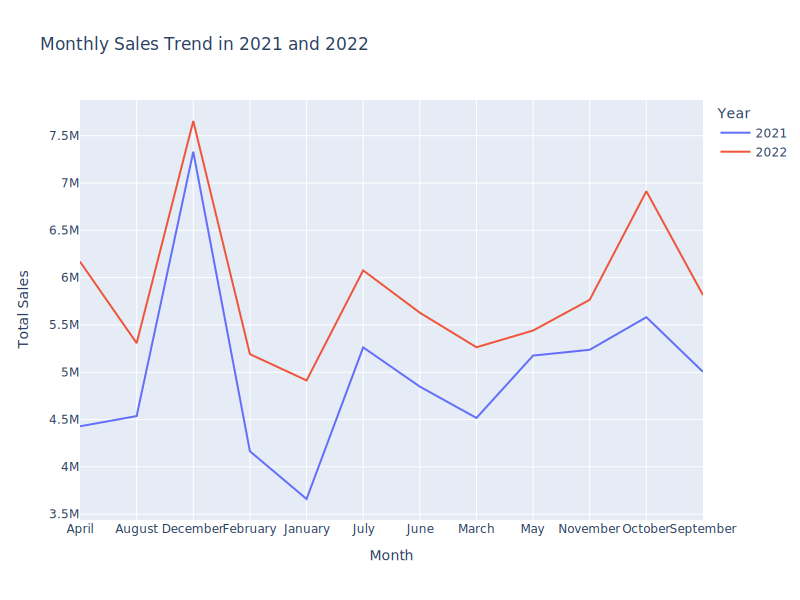

In [20]:
# Filter data for 2021 and 2022, group by year and month
bbm_2021_2022 = df[(df['Year'] == 2021) | (df['Year'] == 2022)].groupby(['Year', 'Month'])['Total'].sum().reset_index()

# Create line chart using Plotly Go
fig = go.Figure()

for year in [2021, 2022]:
    year_data = bbm_2021_2022[bbm_2021_2022['Year'] == year]
    fig.add_trace(go.Scatter(x=year_data['Month'], y=year_data['Total'], mode='lines', name=str(year)))

# Set layout
fig.update_layout(title='Monthly Sales Trend in 2021 and 2022',
                  xaxis_title='Month',
                  yaxis_title='Total Sales',
                  legend_title='Year',
                  autosize=False,
                  width=800,
                  height=600)

# Show the line chart
fig.show("svg")

>*The chart above shows very similar patterns of sales across the months in 2021 and 2022. The peak sales are recorded in December while the least sales are recorded in January. In December 2021, the total revenue was 7.33M Naira and  in 2022, the total revenue was 7.66M. This amount to a 4.50% increase. Overall, the sales performance in 2022 is better than what was recorded in 2021.*

##### **Daily Sales Performance**

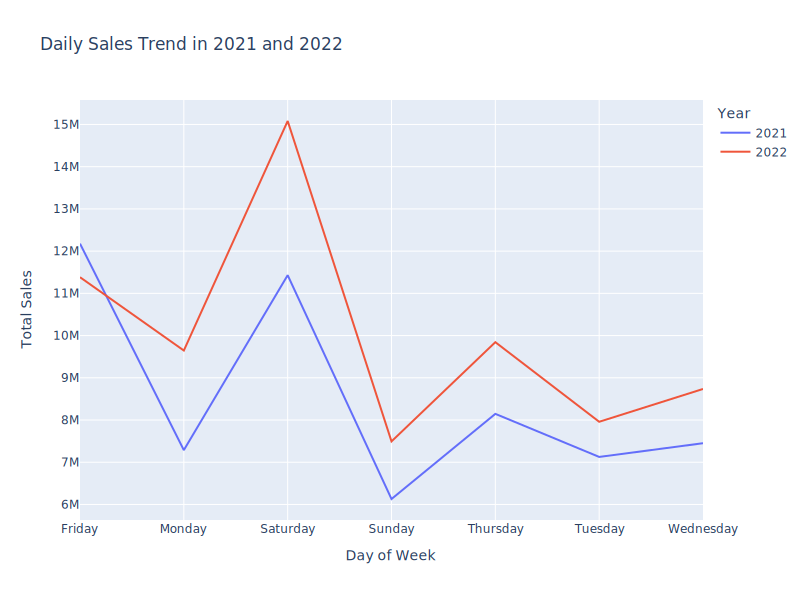

In [21]:
# Filter data for 2021 and 2022, group by year and Day of Week
bbd_2021_2022 = df[(df['Year'] == 2021) | (df['Year'] == 2022)].groupby(['Year', 'Day_of_Week'])['Total'].sum().reset_index()

# Create line chart using Plotly Go
fig = go.Figure()

for year in [2021, 2022]:
    year_data = bbd_2021_2022[bbd_2021_2022['Year'] == year]
    fig.add_trace(go.Scatter(x=year_data['Day_of_Week'], y=year_data['Total'], mode='lines', name=str(year)))

# Set layout
fig.update_layout(title='Daily Sales Trend in 2021 and 2022',
                  xaxis_title='Day of Week',
                  yaxis_title='Total Sales',
                  legend_title='Year',
                  autosize=False,
                  width=800,
                  height=600)


# Show the line chart
fig.show("svg")

>*The above chart highlights strikingly similar sales patterns observed across the days in both 2021 and 2022. Saturdays consistently exhibit the highest sales, while Sundays consistently report the lowest. Interestingly, there is an atypical trend in Friday sales, with 2021 showing higher Friday sales compared to 2022. This divergence is not mirrored in the sales patterns of other days of the week for either year.*

##### **Investigating Interesting Purchases**

In [22]:
df[df["Total"] == df.Total.max()]

,Product,SKU,Contact ID,Invoice No.,Date,Quantity,Unit Price,Total,Month,Day_of_Week,Year,Week
17413,Turkey,160,CO0316,23546,2022-03-17,60 Kg,2800,"168,000.00",March,Thursday,2022,63


>*In year 2022, the highest single transaction recorded was by a customer with Contact ID CO0316. 60kg of Turkey was purhcased at a unit Price of 2800 making a total of N168,000.*

##### **Analysing Seasonal Sales**

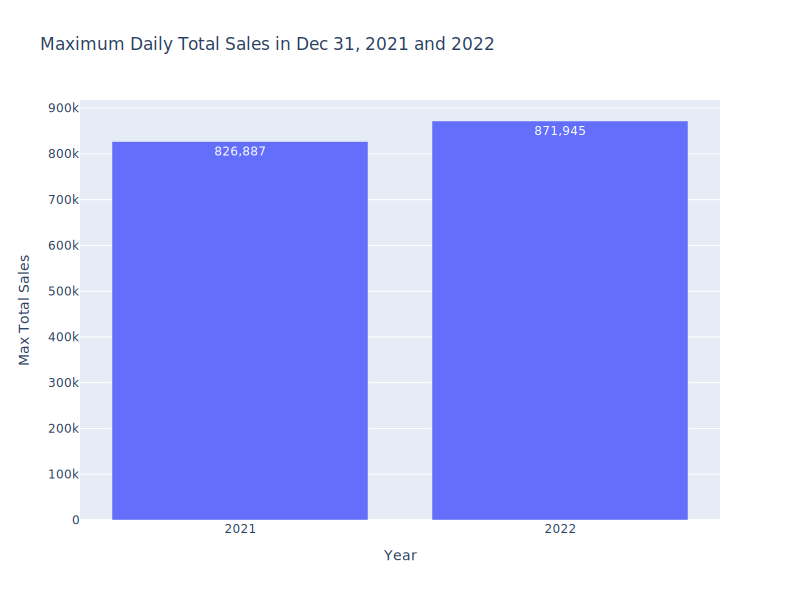

In [23]:
# Set locale for formatting numbers with commas
locale.setlocale(locale.LC_ALL, '')

# Data for 2021
df_21 = df[df['Year'] == 2021]
result_21_max = df_21.groupby('Date')['Total'].sum().sort_values().reset_index().sort_values(by="Total", ascending=False).max()

# Data for 2022
df_22 = df[df['Year'] == 2022]
result_22_max = df_22.groupby('Date')['Total'].sum().sort_values().reset_index().sort_values(by="Total", ascending=False).max()

# Create a list of years and corresponding max total sales
years = [2021, 2022]
max_sales = [result_21_max['Total'], result_22_max['Total']]

# Format numbers with commas
formatted_max_sales = [locale.format_string("%d", sales, grouping=True) for sales in max_sales]

# Create a bar chart using Plotly
fig = go.Figure(data=[go.Bar(x=years, y=max_sales, text=formatted_max_sales, textposition='auto', hovertemplate='%{text} Naira')])

# Update layout for better visualization
fig.update_layout(title='Maximum Daily Total Sales in Dec 31, 2021 and 2022',
                  xaxis_title='Year',
                  yaxis_title='Max Total Sales',
                  xaxis=dict(
                      tickvals=years,
                      ticktext=[str(year) for year in years]
                  ),
                  template='plotly',
                  autosize=False,
                  width=800,
                  height=600)

# Display the chart
fig.show("svg")

>*The chart above shows that the highest daily sales were recorded on 31st Dec 2021 and 31st Dec 2022. For the year 2021, the highest daily sales was N826,887 while for year 2022, the highest daily sales was N871,894. This represents a growth of 5.44% increase in seasonal sales.*

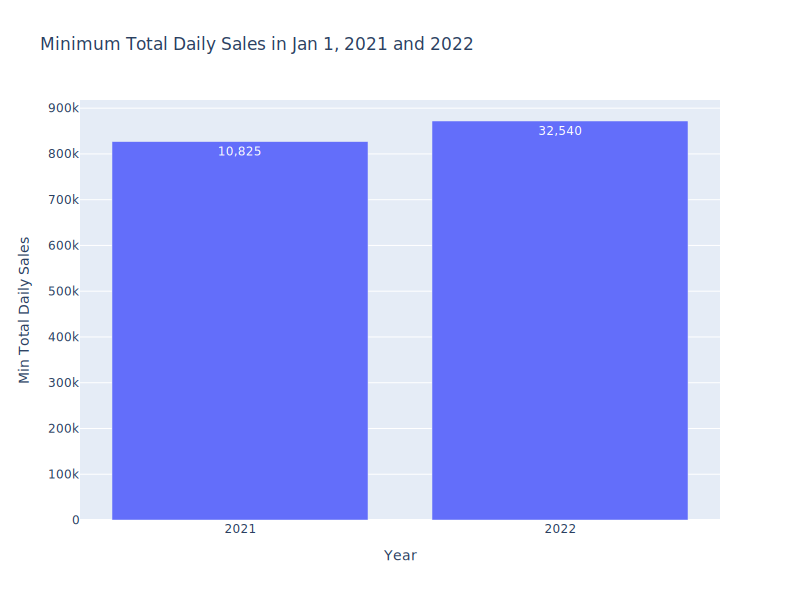

In [24]:
# Set locale for formatting numbers with commas
locale.setlocale(locale.LC_ALL, '')

# Data for 2021
df_21 = df[df['Year'] == 2021]
result_21_min = df_21.groupby('Date')['Total'].sum().sort_values().reset_index().sort_values(by="Total", ascending=False).min()

# Data for 2022
df_22 = df[df['Year'] == 2022]
result_22_min = df_22.groupby('Date')['Total'].sum().sort_values().reset_index().sort_values(by="Total", ascending=False).min()

# Create a list of years and corresponding max total sales
years = [2021, 2022]
min_sales = [result_21_min['Total'], result_22_min['Total']]

# Format numbers with commas
formatted_min_sales = [locale.format_string("%d", sales, grouping=True) for sales in min_sales]

# Create a bar chart using Plotly
fig = go.Figure(data=[go.Bar(x=years, y=max_sales, text=formatted_min_sales, textposition='auto', hovertemplate='%{text} Naira')])

# Update layout for better visualization
fig.update_layout(title='Minimum Total Daily Sales in Jan 1, 2021 and 2022',
                  xaxis_title='Year',
                  yaxis_title='Min Total Daily Sales',
                  xaxis=dict(
                      tickvals=years,
                      ticktext=[str(year) for year in years]
                  ),
                  template='plotly',
                  autosize=False,
                  width=800,
                  height=600)

# Display the chart
fig.show("svg")

>*The chart above shows that the lowest daily sales were recorded on 1st Jan 2021 and 1st Jan 2022. For the year 2021, the lowest daily sales was N10,825 while for year 2022, the lowest daily sales was N32,540. This represents a growth of 200% increase in seasonal sales. Relatively, Ollems had a better performance in seasonal sales in January 2022 than they did in December 2022.*

##### **Estimating the percentage Increase in Prices of Products**

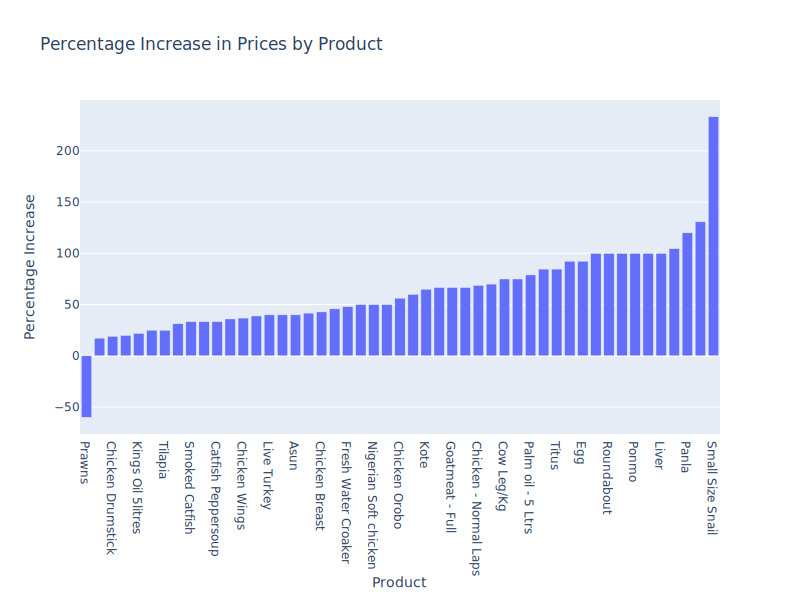

In [25]:
# Calculate the percentage increase in prices for each unique product
result_df = pd.DataFrame(columns=['Product', 'Percentage Increase'])

for product in df['Product'].unique():
    product_df = df[df['Product'] == product]

    initial_price = product_df['Unit Price'].iloc[0]
    final_price = product_df['Unit Price'].iloc[-1]

    percentage_increase = ((final_price - initial_price) / initial_price) * 100

    if not np.isnan(percentage_increase) and percentage_increase != 0:
        result_df = result_df.append({'Product': product, 'Percentage Increase': percentage_increase}, ignore_index=True)

# Sort the result DataFrame from highest to lowest percentage increase
result_df = result_df.sort_values(by='Percentage Increase', ascending=False).reset_index(drop=True)

# Create a bar chart using Plotly Go
fig = go.Figure(data=[
    go.Bar(x=result_df['Product'], y=result_df['Percentage Increase'])
])

# Customize the layout
fig.update_layout(
    title='Percentage Increase in Prices by Product',
    xaxis_title='Product',
    yaxis_title='Percentage Increase',
    autosize=False,
    width=800,
    height=600,
    xaxis={'categoryorder': 'total ascending'}  # Sort x-axis labels in ascending order
)

# Show the bar chart
fig.show("svg")

>*The chart above shows the products that have had changes in price between 2021 and 2022. Most of these products have recorded sporadic increase in prices due to inflation. Inflation as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used.
Nigeria inflation rate for 2022 was 18.85%, a 1.89% increase from 2021.*

>*Source: https://www.macrotrends.net/countries/NGA/nigeria/inflation-rate-cpi#:~:text=Nigeria%20inflation%20rate%20for%202022,a%200.7%25%20decline%20from%202018.*

>*Small size snail has the highest percentage increase of 233%. Prawns is the only product that had a decrease in price within the period considered. Measures to deal with the effect of sharp increase in prices due to economic factors must be considered by Ollems Farm in order to remain in competitive in the market.*

##### **Weekly Sales Performance**

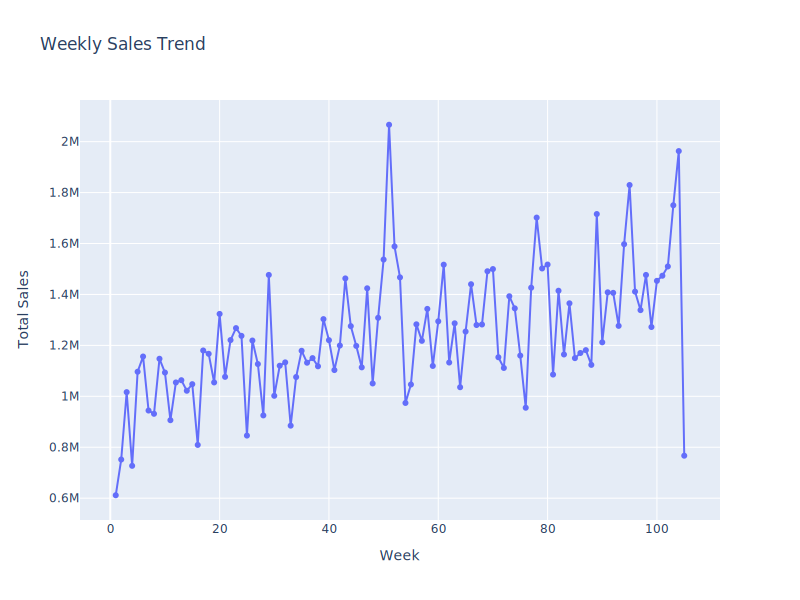

In [26]:
bbw = df.groupby('Week')['Total'].sum().reset_index().sort_values(by = "Week", ascending = True)


# Create a line chart using Plotly
fig = go.Figure(data=go.Scatter(x=bbw['Week'], y=bbw['Total'], mode='lines+markers'))

# Customize the layout
fig.update_layout(title='Weekly Sales Trend',
                  xaxis_title='Week', yaxis_title='Total Sales',
                  autosize=False,
                  width=800,
                  height=600)

# Show the line chart
fig.show("svg")

>*The chart above shows the sales trend between from week 1 to  105. As can be seen, there is a uptrend in weekly sales from January 1, 2021 to December, 2022. However, there are some notable spikes and dips across these periods.Some of the notable spikes records are in week 3,6,20,29, 51,61, 78, 89 and 104. The weeks with notable dips are 1, 16, 25,33, 54,76, 81, 88, 90 and 105. We see a signficantly sharp increase in sales from week 50 to 51 and a sharp decline in sales from 104 to 105. The decline from week 104 to 105 can be attributed to the unwinding effect of seasonal sales. The "unwinding effect" in the context of seasonal sales refers to the phenomenon where a business experiences a decline in sales volume after a peak period of high sales. This drop in sales can occur as the high-demand period ends, often leading to reduced customer traffic and lower purchasing activity.  It's important for Ollems Farm to anticipate and manage this effect by adjusting their strategies, such as offering post-season sales or promotions, in order to maintain a steady level of business activity throughout the year.*

##### **Customer Analysis of Ollems Farm Using Recency, Frequency and Monetary Value**.

RFM analysis, a powerful marketing technique, quantifies and categorizes customers based on three critical factors: recency, frequency, and monetary value of their recent transactions. This approach unveils insights into customer segments, aids in pinpointing the most valuable customers, and enables targeted marketing initiatives. Employing numerical scores for each customer, the analysis remains impartial and actionable. A central tenet underlying RFM analysis is the well-known principle that "80% of your business comes from 20% of your customers."

The recency value gauges the time elapsed since a customer's last transaction, compared to the analysis date (01/01/2023 in this case), to determine the gap since their most recent purchase.

The frequency value quantifies the total count of customer transactions.

The monetary value sums up the entirety of each customer's purchases.

In the context of Ollems Farm, RFM calculation excludes records for Ollems credit, Grill, and Walk-in Customers. Grill and Walk-in customers, as a broad category, defy individual tracking, undermining the precision of customer segmentation for strategic marketing. This exclusion safeguards against skewed results and misleading interpretations.

The elegance of RFM lies in its ability to identify not just high spenders but also those who exhibit both recent and frequent activity. This dual perspective empowers businesses to engage with their customers effectively, fostering well-rounded customer relationships.






In [27]:
# Excluding Ollems Grill Credit, Walk-in Customer and Grill Customer records from the data
RFM_table_ = df[(df["Contact ID"] != "CO0005") & (df['Contact ID'] != "CO0001") & (df["Contact ID"] != "CO0683")]

NOW = dt.datetime(2023, 1, 1) # Setting our analysis date to 01/01/2023 to gain a better insight into the customer segments since the last transaction was recorded in the last day of the month of December.

In [28]:
# RFM Table
RFM_table = RFM_table_.groupby(['Contact ID']).agg({'Date': lambda x: (NOW - x.max()).days, # Recency Value
                                                'Invoice No.': lambda x: len(x.unique()), # Frequency Value
                                                'Total': lambda x: x.sum()})    # Monetary Value

RFM_table['Date'] = RFM_table['Date'].astype(int)

RFM_table.rename(columns={'Date': 'recency',
                        'Invoice No.': 'frequency',
                         'Total': 'monetaryvalue'}, inplace=True)
RFM_table.head()

,recency,frequency,monetaryvalue
Contact ID,,,
CO0008,2,11,"47,580.00"
CO0009,645,3,"13,200.00"
CO0010,1,8,"43,200.00"
CO0011,2,1,"3,400.00"
CO0012,162,1,"1,100.00"


In [29]:
#RFM score values
RFM_table['recencyscore'] = pd.qcut(RFM_table['recency'],5,labels=[5,4,3,2,1])
RFM_table['frequencyscore'] = pd.qcut(RFM_table['frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
RFM_table['monetaryscore'] = pd.qcut(RFM_table['monetaryvalue'],5,labels=[1,2,3,4,5])


#RFM score values are combined side by side in str format
(RFM_table['recencyscore'].astype(str) +
RFM_table['frequencyscore'].astype(str) +
RFM_table['monetaryscore'].astype(str)).head()

Contact ID
CO0008    554
CO0009    133
CO0010    544
CO0011    511
CO0012    211
dtype: object

In [30]:
RFM_table.head()

,recency,frequency,monetaryvalue,recencyscore,frequencyscore,monetaryscore
Contact ID,,,,,,
CO0008,2,11,"47,580.00",5,5,4
CO0009,645,3,"13,200.00",1,3,3
CO0010,1,8,"43,200.00",5,4,4
CO0011,2,1,"3,400.00",5,1,1
CO0012,162,1,"1,100.00",2,1,1


In [31]:
#calculation of the RFM score
RFM_table["RFMscore"] = RFM_table['recencyscore'].astype(str) + RFM_table['frequencyscore'].astype(str) + RFM_table['monetaryscore'].astype(str)

In [32]:
RFM_table.head()

,recency,frequency,monetaryvalue,recencyscore,frequencyscore,monetaryscore,RFMscore
Contact ID,,,,,,,
CO0008,2,11,"47,580.00",5,5,4,554
CO0009,645,3,"13,200.00",1,3,3,133
CO0010,1,8,"43,200.00",5,4,4,544
CO0011,2,1,"3,400.00",5,1,1,511
CO0012,162,1,"1,100.00",2,1,1,211


In [33]:
# transposition of the RFM table. This makes it easier to evaluate.
RFM_table.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,"1,502.00",188.58,207.25,1.00,33.00,98.00,294.75,730.00
frequency,"1,502.00",7.73,29.19,1.00,1.00,3.00,6.00,858.00
monetaryvalue,"1,502.00","64,367.88","262,633.21",600.00,"5,800.00","16,125.00","51,738.75","7,968,308.50"


>*The RFM summary table provides key metrics for customers. Regarding recency, the values range from 1, denoting recent purchases relative to the analysis day, to a maximum of 730, representing the time since last purchase. For frequency, values span from 1 to 858, revealing customer visit patterns. Examining the highest frequency can offer deeper insights. Concerning monetary value, spending varies from N600 to N7,968,308.50 illustrating expenditure ranges.*

In [34]:
RFM_table = RFM_table.reset_index()

# Investigating the first 5 records of ollems customers with RFM Score 555
RFM_table[RFM_table["RFMscore"] == "555"].head()

,Contact ID,recency,frequency,monetaryvalue,recencyscore,frequencyscore,monetaryscore,RFMscore
5,CO0013,1,13,"159,900.00",5,5,5,555
16,CO0029,18,31,"115,775.00",5,5,5,555
24,CO0039,1,389,"3,213,286.00",5,5,5,555
27,CO0042,5,169,"758,917.50",5,5,5,555
49,CO0068,9,60,"1,584,170.00",5,5,5,555


>*The table displays top customers with excellent RFM Scores, indicating their significant value to the business. They exhibit high monetary value, frequent visits, and low recency, indicating frequent high-value purchases.*

**Identifying the customer with frequency value 858 and monetary value N7,968,308.50**

In [35]:
# Customer with the highest frequency value
RFM_table[RFM_table["frequency"] == 858]

,Contact ID,recency,frequency,monetaryvalue,recencyscore,frequencyscore,monetaryscore,RFMscore
450,CO0656,1,858,"3,386,586.25",5,5,5,555


>*The customer with the highest frequency value is the customer with Contact ID CO0656.*

In [36]:
# Customer with the highest monetary value
RFM_table[RFM_table["monetaryvalue"] == 7968308.50]

,Contact ID,recency,frequency,monetaryvalue,recencyscore,frequencyscore,monetaryscore,RFMscore
414,CO0602,1,434,"7,968,308.50",5,5,5,555


>*The customer with the highest frequency value is the customer with Contact ID CO0602.*

In [37]:
#segmenting of customers according to RecencyScore and FrequencyScore values

seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [38]:
# creation of segment variable
RFM_table['segment'] = RFM_table['recencyscore'].astype(str) + RFM_table['frequencyscore'].astype(str)
RFM_table['segment'] = RFM_table['segment'].replace(seg_map, regex=True)

In [39]:
rfm_df  = RFM_table.copy()

In [40]:
rfm_df.head()

,Contact ID,recency,frequency,monetaryvalue,recencyscore,frequencyscore,monetaryscore,RFMscore,segment
0,CO0008,2,11,"47,580.00",5,5,4,554,Champions
1,CO0009,645,3,"13,200.00",1,3,3,133,At Risk
2,CO0010,1,8,"43,200.00",5,4,4,544,Champions
3,CO0011,2,1,"3,400.00",5,1,1,511,New Customers
4,CO0012,162,1,"1,100.00",2,1,1,211,Hibernating


In [41]:
segment_counts = rfm_df.groupby('segment').size().reset_index(name = "counts")
segment_counts

,segment,counts
0,About to Sleep,115
1,At Risk,220
2,Can't Lose,33
3,Champions,208
4,Hibernating,343
5,Loyal Customers,264
6,Need Attention,74
7,New Customers,18
8,Potential Loyalists,203
9,Promising,24


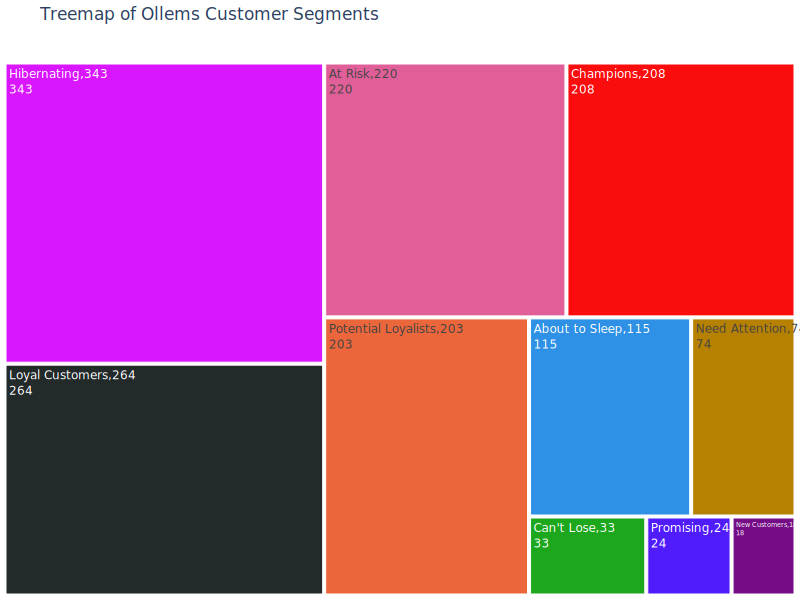

In [42]:
# Plot arguments
sizes = segment_counts.counts.to_list()
color = px.colors.qualitative.Dark24  # Use a qualitative color palette
label = list(zip(segment_counts.segment, segment_counts.counts))

# Create a treemap plot using Plotly Go
fig = go.Figure(go.Treemap(
    labels=label,
    parents=[''] * len(label),
    values=sizes,
    textinfo="label+value",
    marker_colors=color
))

# Update layout
fig.update_layout(
    title="Treemap of Ollems Customer Segments",
    margin=dict(l=0, r=0, t=40, b=0),
    autosize=False,
    width=800,
    height=600
)

# Show the plot
fig.show("svg")

In [43]:
rfm_df[["segment","recency","frequency","monetaryvalue"]].groupby("segment").agg(["mean","count"])

recency       frequency       monetaryvalue      
                       mean count      mean count          mean count
segment                                                              
About to Sleep       104.69   115      1.16   115      6,761.61   115
At Risk              343.76   220      3.81   220     35,622.99   220
Can't Lose           302.12    33     15.03    33    107,595.12    33
Champions              9.50   208     28.99   208    221,916.97   208
Hibernating          440.15   343      1.10   343      8,937.57   343
Loyal Customers       65.65   264     11.83   264    114,910.62   264
Need Attention        97.66    74      2.54    74     17,450.74    74
New Customers          9.56    18      1.00    18      5,847.22    18
Potential Loyalists   33.17   203      1.86   203     16,808.21   203
Promising             50.33    24      1.00    24      6,078.33    24

**Segment Analysis:**

Three segments, namely "Can't Lose," "Hibernating," and "Champions," have been chosen for evaluation.

**Segment Statistics:**

* "Can't Lose" segment: 33 customers
* "Hibernating" segment: 343 customers
* "Champions" segment: 208 customers

**"Can't Lose" Segment:**

* Customers in this segment made their last purchase about 302 days ago on average.
* On average, customers in this segment have made 15 purchases.
* The average amount spent by customers in this segment is N107,595.

**"Hibernating" Segment:**

* Customers in this segment made their last purchase about 440 days ago on average.
* On average, customers in this segment have made 1 purchase.
* The average amount spent by customers in this segment is N8, 937.57

**"Champions" Segment:**

* Customers in this segment made their last purchase about 9 days ago on average.
* On average, customers in this segment have made 30 purchases.
* The average amount spent by customers in this segment is N221,916.97.

**Segment Insights:**

"Can't Lose" Segment:
Customers in this segment have not made recent purchases. Ollems Farm management should devise a discount and gift campaign to re-engage these customers. Although they made significant purchases initially, their recency values are now lower than expected. The campaign should include recommended items based on their past activity. Additionally, introducing new and popular products related to their previous purchases could be effective. It's important to investigate factors that might have led these customers to stop buying.

**"Hibernating" Segment:**
Customers in this segment haven't made purchases for an extended period. Implementing discounts could encourage them to make a purchase again.

**"Champions" Segment:**
This segment contributes significantly to the overall revenue. Continuous engagement is vital for these customers. Special campaigns should be designed to maintain their loyalty and encourage ongoing purchases.

##### **Cohort Analysis**

Cohort analysis is a valuable analytical methodology that involves classifying and segregating data into distinct groups characterized by shared attributes before undertaking analysis. This technique holds significance in efficiently segmenting data, thereby aiding organizations in dissecting, scrutinizing, and unveiling intricate patterns that unfold throughout the lifespan of individual users or customers. Its primary objectives include fine-tuning strategies for customer retention, unraveling intricate behavioral patterns exhibited by users within specific cohorts, and enhancing the depth of comprehension about user engagement and interaction within these segmented cohorts. By adopting cohort analysis, organizations can methodically assess user behavior, draw insightful conclusions, and implement targeted interventions to optimize customer engagement, foster long-term loyalty, and boost overall business outcomes.

In [44]:
cdf = df[(df["Contact ID"] != "CO0005") & (df['Contact ID'] != "CO0001") & (df["Contact ID"] != "CO0683")]


def get_month(x): return dt.datetime(x.year, x.month, 1)
cdf['InvoiceMonth'] = cdf['Date'].apply(get_month)
grouping = cdf .groupby(['Contact ID'])['InvoiceMonth']
cdf ['CohortMonth'] = grouping.transform('min')

def get_date_int(cdf, column):
    year = cdf [column].dt.year
    month = cdf [column].dt.month
    day = cdf [column].dt.day
    return year, month, day


invoice_year, invoice_month, _ = get_date_int(cdf , 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(cdf , 'CohortMonth')


years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [45]:
cdf['CohortIndex'] = years_diff * 12 + months_diff + 1
cdf.head()

,Product,SKU,Contact ID,Invoice No.,Date,Quantity,Unit Price,Total,Month,Day_of_Week,Year,Week,InvoiceMonth,CohortMonth,CohortIndex
0,Old layers,179,CO0029,11716,2021-01-01,2 Pc(s),2200,"4,400.00",January,Friday,2021,1,2021-01-01,2021-01-01,1
1,Cow Beef/Kg,232,CO0029,11716,2021-01-01,1 Kg,2500,"2,500.00",January,Friday,2021,1,2021-01-01,2021-01-01,1
2,Turkey,160,CO0838,11717,2021-01-01,2.5 Kg,2000,"5,000.00",January,Friday,2021,1,2021-01-01,2021-01-01,1
3,Chicken Wings,158,CO0577,11718,2021-01-01,1 Kg,1900,"1,900.00",January,Friday,2021,1,2021-01-01,2021-01-01,1
4,Titus,161,CO0577,11718,2021-01-01,0.9 Kg,1300,"1,170.00",January,Friday,2021,1,2021-01-01,2021-01-01,1


In [46]:
# Count monthly active customers from each cohort
grouping = cdf .groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Contact ID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index = 'CohortMonth',
                                 columns = 'CohortIndex',
                                 values = 'Contact ID')

In [47]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01,247.00,114.00,113.00,100.00,100.00,92.00,92.00,60.00,63.00,77.00,63.00,77.00,50.00,63.00,79.00,61.00,62.00,59.00,75.00,83.00,85.00,79.00,77.00,75.00
2021-02-01,107.00,43.00,31.00,30.00,34.00,31.00,30.00,28.00,28.00,27.00,32.00,17.00,21.00,32.00,21.00,21.00,23.00,32.00,31.00,27.00,32.00,28.00,28.00,NaN
2021-03-01,64.00,17.00,15.00,15.00,15.00,12.00,12.00,11.00,16.00,14.00,8.00,7.00,20.00,9.00,12.00,10.00,17.00,16.00,14.00,19.00,12.00,12.00,NaN,NaN
2021-04-01,61.00,15.00,11.00,11.00,11.00,6.00,7.00,12.00,13.00,7.00,8.00,11.00,12.00,9.00,7.00,14.00,20.00,10.00,20.00,10.00,9.00,NaN,NaN,NaN
2021-05-01,85.00,23.00,21.00,9.00,11.00,15.00,11.00,15.00,4.00,10.00,14.00,11.00,8.00,9.00,14.00,12.00,16.00,13.00,17.00,15.00,NaN,NaN,NaN,NaN
2021-06-01,49.00,14.00,5.00,7.00,11.00,11.00,7.00,6.00,5.00,9.00,10.00,9.00,6.00,10.00,9.00,10.00,13.00,7.00,13.00,NaN,NaN,NaN,NaN,NaN
2021-07-01,52.00,4.00,7.00,9.00,8.00,6.00,5.00,8.00,5.00,11.00,6.00,5.00,11.00,10.00,8.00,8.00,9.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-01,34.00,5.00,5.00,4.00,3.00,1.00,2.00,5.00,4.00,1.00,4.00,4.00,5.00,6.00,6.00,5.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-01,49.00,13.00,10.00,10.00,10.00,7.00,9.00,11.00,14.00,8.00,14.00,12.00,13.00,14.00,13.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Calculate Retention rate
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis = 0)
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01,100.00,46.20,45.70,40.50,40.50,37.20,37.20,24.30,25.50,31.20,25.50,31.20,20.20,25.50,32.00,24.70,25.10,23.90,30.40,33.60,34.40,32.00,31.20,30.40
2021-02-01,100.00,40.20,29.00,28.00,31.80,29.00,28.00,26.20,26.20,25.20,29.90,15.90,19.60,29.90,19.60,19.60,21.50,29.90,29.00,25.20,29.90,26.20,26.20,NaN
2021-03-01,100.00,26.60,23.40,23.40,23.40,18.80,18.80,17.20,25.00,21.90,12.50,10.90,31.20,14.10,18.80,15.60,26.60,25.00,21.90,29.70,18.80,18.80,NaN,NaN
2021-04-01,100.00,24.60,18.00,18.00,18.00,9.80,11.50,19.70,21.30,11.50,13.10,18.00,19.70,14.80,11.50,23.00,32.80,16.40,32.80,16.40,14.80,NaN,NaN,NaN
2021-05-01,100.00,27.10,24.70,10.60,12.90,17.60,12.90,17.60,4.70,11.80,16.50,12.90,9.40,10.60,16.50,14.10,18.80,15.30,20.00,17.60,NaN,NaN,NaN,NaN
2021-06-01,100.00,28.60,10.20,14.30,22.40,22.40,14.30,12.20,10.20,18.40,20.40,18.40,12.20,20.40,18.40,20.40,26.50,14.30,26.50,NaN,NaN,NaN,NaN,NaN
2021-07-01,100.00,7.70,13.50,17.30,15.40,11.50,9.60,15.40,9.60,21.20,11.50,9.60,21.20,19.20,15.40,15.40,17.30,19.20,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-01,100.00,14.70,14.70,11.80,8.80,2.90,5.90,14.70,11.80,2.90,11.80,11.80,14.70,17.60,17.60,14.70,11.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-01,100.00,26.50,20.40,20.40,20.40,14.30,18.40,22.40,28.60,16.30,28.60,24.50,26.50,28.60,26.50,14.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


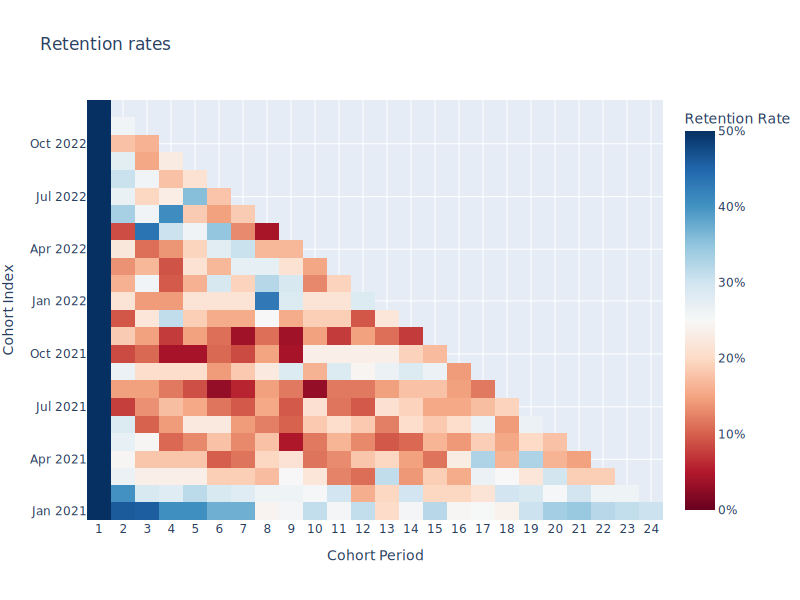

In [49]:
fig = go.Figure(data=go.Heatmap(
    z=retention.values,
    x=[str(x) for x in retention.columns],
    y=[str(y) for y in retention.index],
    text=[[f"{val:.0%}" for val in row] for row in retention.values],
    hoverinfo="text",
    colorscale="RdBu",
    colorbar=dict(
        title="Retention Rate",
        tickvals=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
        ticktext=['0%', '10%', '20%', '30%', '40%', '50%']
    ),
    zmin=0.0,
    zmax=0.5
))

fig.update_layout(
    title='Retention rates',
    xaxis_title='Cohort Period',
    yaxis_title='Cohort Index',
    autosize=False,
    width=800,
    height=600
)

fig.show("svg")

>*Analyzing the retention rates across the recorded months (reading from the leftmost column to the right), it becomes evident that there is a consistent decrease in the retention rates among customers who engage with the business from January, 2021 to December, 2022. Ollems Farms should delve into the underlying reasons for this decline in repeat patronage. To address this, the management should initiate a customer survey aimed at gaining deeper insights into the factors contributing to the monthly customer attrition.*

##### **Forecasting Daily Sales for January, 2023 for Each Product Using Facebook Prophet**

This code employs the Facebook Prophet model to predict sales for each product, considering Nigerian holidays and seasonality. The results are stored in forecast_df, providing insights into Ollems product sales performance for the specified time period.

In [50]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Define Nigerian holidays
nigerian_holidays = holidays.CountryHoliday('NG', prov=None, state=None)

# Create an empty DataFrame to store forecasts
forecast_df = pd.DataFrame(columns=['product', 'sku', 'date', 'forecast'])

# Loop through each unique product
for product in df['product'].unique():
    product_df = df[df['product'] == product][['date', 'total']].rename(columns={'date': 'ds', 'total': 'y'})

    # Check if the product has enough data points for forecasting
    if len(product_df) >= 2:
        # Create a DataFrame for holidays with "ds" and "holiday" columns
        holidays_df = pd.DataFrame({
            'ds': list(nigerian_holidays.keys()),
            'holiday': 'nigerian_holiday'
        })

        # Initialize and fit Prophet model
        model = Prophet(holidays=holidays_df, yearly_seasonality=True)
        model.add_country_holidays(country_name='NG')
        model.fit(product_df)

        # Create a DataFrame for future dates (January)
        future = model.make_future_dataframe(periods=31, freq='D', include_history=False)

        # Make forecast
        forecast = model.predict(future)

        # Append SKU and forecast to the forecast_df
        forecast['product'] = product
        forecast['sku'] = df[df['product'] == product]['sku'].values[0]
        forecast_df = forecast_df.append(forecast[['product', 'sku', 'ds', 'yhat']], ignore_index=True)
        forecast_df = forecast_df[['product', 'sku', 'ds', 'yhat']]
        forecast_df = forecast_df[forecast_df['yhat'] >= 0]

# Display the resulting forecast DataFrame
print(forecast_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmij8ifcv/_zytzltb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmij8ifcv/ox97does.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4414', 'data', 'file=/tmp/tmpmij8ifcv/_zytzltb.json', 'init=/tmp/tmpmij8ifcv/ox97does.json', 'output', 'file=/tmp/tmpmij8ifcv/prophet_model7l1ry0jo/prophet_model-20230817163906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:39:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:39:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmij

                product  sku         ds      yhat
0            Old layers  179 2023-01-01  7,954.27
1            Old layers  179 2023-01-02  8,726.25
2            Old layers  179 2023-01-03 12,572.85
3            Old layers  179 2023-01-04 12,210.68
4            Old layers  179 2023-01-05 12,032.26
...                 ...  ...        ...       ...
1732  Tin Tomato Medium  267 2023-01-23      6.53
1760         Owere Fish  270 2023-01-24  1,034.53
1761         Owere Fish  270 2023-01-25 19,168.30
1762         Owere Fish  270 2023-01-26 37,107.42
1763         Owere Fish  270 2023-01-27 45,185.36

[1737 rows x 4 columns]


In [51]:
forecast_df.head()

,product,sku,ds,yhat
0,Old layers,179,2023-01-01,"7,954.27"
1,Old layers,179,2023-01-02,"8,726.25"
2,Old layers,179,2023-01-03,"12,572.85"
3,Old layers,179,2023-01-04,"12,210.68"
4,Old layers,179,2023-01-05,"12,032.26"


In [52]:
forecast_df.tail()

,product,sku,ds,yhat
1732,Tin Tomato Medium,267,2023-01-23,6.53
1760,Owere Fish,270,2023-01-24,"1,034.53"
1761,Owere Fish,270,2023-01-25,"19,168.30"
1762,Owere Fish,270,2023-01-26,"37,107.42"
1763,Owere Fish,270,2023-01-27,"45,185.36"


In [53]:
print("The number of products forecasted for is:", forecast_df["product"].nunique())
print("The number of SKUs forecasted for is:", forecast_df["sku"].nunique())

The number of products forecasted for is: 68
The number of SKUs forecasted for is: 68


>*The result above show the forecast generated for 68 SKUs/products including their sales in each day in January, 2023. Since the last month of sales recorded is December, 2022, it is possible to generate the forecast for each of the products for the subsequent days in the following year and months. For this study, the forecast generated was limited only to January, 2023. The prophet package helps to achieve this. For instance, the sales of Old Layers with sku code 179 for the January 1, 2023 is estimated to be N7,954, for January 2, it is estimated to be N8,726 and for January 3, it is estimated to be N12,572. Based on these projections, the actual quantity to be sold can be derived by dividing the estimated daily total sales by the unit price of the product. This enables the business to have a robust inventory management plan. Some of the key areas where the business will benefit includes demend planning, inventory optimization, efficient supply chain management, effective promotions, pricing strategy, resource allocation, product lifecycle management, seasonal trends, customer experience, data-driven decision making and competitive advantage.*

>*Overall, forecasting will empower Ollems farm business to optimize their operations, enhance customer experiences, and make data-driven decisions that lead to improved profitability and long-term success.*

**Strategic Business Recommendations**

Collect and Maintain Customer Contact Information: To enhance marketing efforts, it's crucial to collect and store customers' phone numbers and email addresses. This will enable targeted marketing strategies for different customer segments, fostering higher revenue and improving the retention rates of new monthly customers.

Monitor and Record Cost of Sales: Implement a daily tracking and recording system for all costs associated with sales. This data will contribute to calculating profits using the monthly sales report, providing clearer financial insights.

Avoid Data Redundancy: Prevent duplications in customer identification by maintaining consistent customer IDs. This ensures accurate and organized customer records without unnecessary complexity.

Optimize Sales Operations: Recognize the peak sales day – Saturdays – and ensure that Ollems Farm opens early to accommodate customer demand. Maximize sales representatives' efficiency during peak hours, processing orders promptly to provide swift service.

Prioritize Customer Satisfaction: Enhance customer experience by focusing on efficient order processing and attentive service. Attend to customer needs promptly and maintain a high standard of service for all customers.

Maintain Communication During Closure: In unforeseen circumstances leading to business closure, establish a communication plan to promptly inform customers through SMS or email. Keeping customers informed shows professionalism and maintains positive relationships.